<a href="https://colab.research.google.com/github/CristaldoWeint/M71V-M72V_06-M-todos-de-An-lisis-Multivariado---C09-2024/blob/main/A10_CRISTALDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

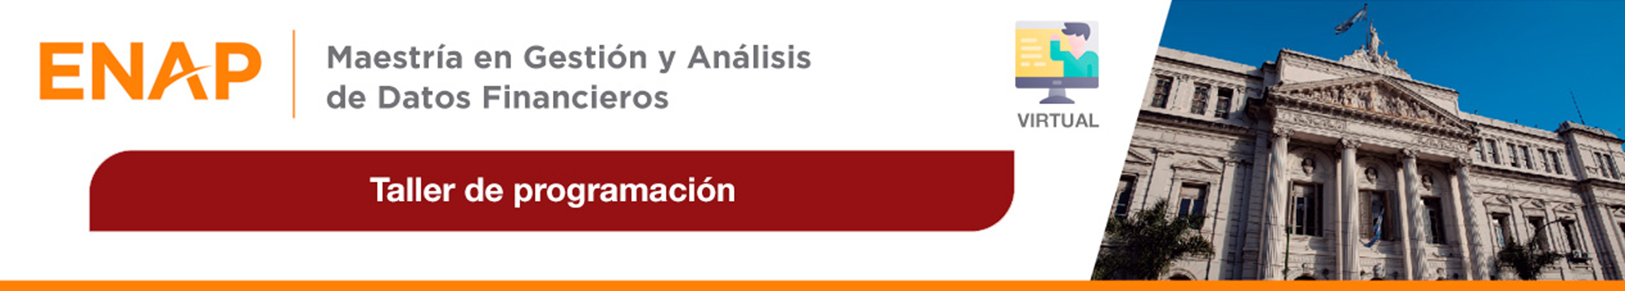

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# TALLER DE PROGRAMACIÓN

Natalia Salaberry

**Actividad 10**

## 1.

**1. Busque un conjunto de datos o utlice el suyo propio para trabajar. Si el archivo de datos no se descarga de la web, entonces subalo a su Drive, compartalo y deje el código de conexión necesario para su lectura.**

El conjunto de base de datos corresponde a los balances anuales de las compañias de seguros de Argentina en 2024.

In [1]:
#1. Mediante conexión a la API de Kaggle con Python:importe el archivo de dato
!pip install kaggle
import pandas as pd #Importamos la librería pandas para utlizar la función que lee .csv (o .xlsx o .txt, etc)

# Configuración de la API de Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset el archivo
dataset = "mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06"
file = "indicadores_sinensup_202406_corregido.csv"
!kaggle datasets download -d {dataset} -f {file}

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06
License(s): DbCL-1.0
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 46.6MB/s]


In [2]:
df_original = pd.read_csv('/content/indicadores_sinensup_202406_corregido.csv', sep=';') #/content/indicadores_sinensup_202406_corregido.csv

In [3]:
df_original.head()


,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
0,1,A,AFIANZADORA,PM,92,RESTO,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2,C,AGROSALTA,PM,113,RESTO,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,3,A,ALBA,PM,121,RESTO,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,4,A,ALLIANZ,PM,11,20,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,5,A,ANTaRTIDA,PM,123,RESTO,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


## 2.

**2. Obtenga una submuestra de su conjunto de datos bajo un objetivo específico**

Se realizara una muestra aleatoria de las compañias Enditad NJ A (sociedades anonimas) y cuyo segmento sea PM (patrimonial y mixta).

  El objetivo será realizar una representación del mercado asegurador mixto de sociedades anonimas analizando la variable Resultado Tecnico Total que son los ingresos por las ventas de seguros y;
    
  se evaluará el impacto de la variable RT RA - Primas Netas (que es la venta de reaseguros) y la posesión de inmuebles en el entendimiento del mercado.

In [4]:
import numpy as np
np.random.seed(2025)

data2 = df_original[(df_original['Entidad NJ'] == 'A') & (df_original['SEGMENTO'] == 'PM')].sample(n=10) ###& (df_original['TOP'] == '50')
data2.shape
#data2.reset_index()

(10, 87)

In [5]:
data2.head(10)

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
58,59,A,INSTITUTO DE SEGUROS,PM,116,RESTO,8.432845e+04,1.259412e+07,2.141918e+06,0.000000e+00,...,1.266517e+07,101360.496,-81378.885,-1752466.679,-2.056900e+07,-7.239274e+06,-2.462781e+06,0.0,-1.066569e+05,-2.569438e+06
76,77,A,MISTA,PM,167,RESTO,7.626455e+03,7.141077e+05,2.838421e+05,0.000000e+00,...,-2.865976e+05,-0.027,299798.228,-15845.952,-1.827019e+05,3.552317e+03,-7.000589e+05,0.0,1.062503e+05,-5.938086e+05
72,73,A,MERCANTIL ANDINA,PM,10,10,9.134200e+05,1.963847e+08,9.357106e+07,4.402092e+07,...,5.624413e+07,2412082.420,21906.278,-1207769.260,-3.250265e+08,-4.194798e+07,-6.002640e+04,0.0,9.169752e+06,9.109726e+06
81,82,A,NORTE,PM,39,50,2.023243e+06,3.349550e+07,1.980771e+07,2.243213e+06,...,2.248047e+07,0.000,-10771.600,-3038290.837,-4.415748e+07,-1.444679e+07,-3.862673e+06,0.0,-5.181899e+05,-4.380863e+06
7,8,A,ASEGURADORES DE CAUCIONES,PM,130,RESTO,1.999841e+05,1.895069e+06,2.736545e+06,4.615690e+06,...,1.295956e+06,28802.967,-50867.933,-231839.299,-2.942577e+06,-1.478699e+06,1.603401e+05,0.0,4.446474e+05,6.049875e+05
89,90,A,PREMIAR,PM,119,RESTO,1.823285e+05,1.400879e+06,2.051653e+06,5.217905e+05,...,2.185221e+06,0.000,-26332.305,-175561.419,1.702213e+06,-3.148689e+06,2.509011e+05,0.0,-1.960582e+05,5.484294e+04
80,81,A,NOBLE,PM,112,RESTO,2.144170e+06,3.814225e+06,2.665831e+06,1.562455e+06,...,6.126160e+06,-115.036,-14876.726,-1060582.124,-9.833363e+06,-1.207062e+06,2.704616e+05,0.0,-7.032463e+04,2.001370e+05
23,24,A,CARDIF,PM,73,RESTO,2.975001e+05,9.915026e+06,6.128600e+06,0.000000e+00,...,0.000000e+00,1178.670,-16663.364,-7877.854,-8.033246e+06,2.424393e+05,-1.928722e+06,0.0,-7.229630e+05,-2.651685e+06
3,4,A,ALLIANZ,PM,11,20,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
6,7,A,ASEGURADORA DEL SUR,PM,125,RESTO,1.908588e+05,1.682388e+06,8.413943e+05,0.000000e+00,...,1.905000e+06,-46477.682,0.000,-99268.425,-2.509935e+06,-1.736091e+05,-7.689554e+04,0.0,-5.349250e+02,-7.743047e+04


## 3.

**3. Realice un análisis de casos anómalos sobre las variables que considere principales para el objetivo buscado**

El análisis se realizara con las variables del balance: Resultado Técnico Total (es decir resultado de la actividad principal), RT RA - Primas Netas (que corresponde a las ventas reaseguros) y A - Inmuebles (que corresponde a la existencia de inmuebles). El objetivo sera analizar si estas variables deben ser consideradas como signficativas y representativas del universo.

In [6]:
#Para poder realizar un boxplot de algún atributo, se importan las librerías:
import seaborn as sb
import matplotlib.pyplot as plt

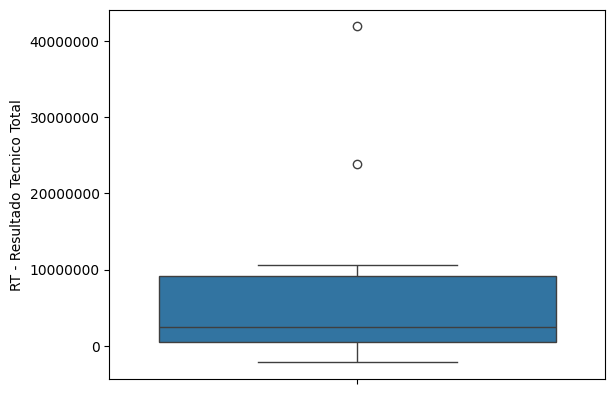

In [7]:
sb.boxplot(data=data2['RT - Resultado Tecnico Total'])
plt.ticklabel_format(style='plain', axis='y')

In [8]:
RT_Total_6 = data2.iloc[:, :6]
RT_Total_rt = data2[['RT - Resultado Tecnico Total']]
resultado = pd.concat([RT_Total_6, RT_Total_rt], axis=1)

resultado.head(10)

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,RT - Resultado Tecnico Total
58,59,A,INSTITUTO DE SEGUROS,PM,116,RESTO,4.776493e+06
76,77,A,MISTA,PM,167,RESTO,-7.036112e+05
72,73,A,MERCANTIL ANDINA,PM,10,10,4.188795e+07
81,82,A,NORTE,PM,39,50,1.058412e+07
7,8,A,ASEGURADORES DE CAUCIONES,PM,130,RESTO,1.639039e+06
89,90,A,PREMIAR,PM,119,RESTO,3.399591e+06
80,81,A,NOBLE,PM,112,RESTO,1.477523e+06
23,24,A,CARDIF,PM,73,RESTO,-2.171161e+06
3,4,A,ALLIANZ,PM,11,20,2.387788e+07
6,7,A,ASEGURADORA DEL SUR,PM,125,RESTO,9.671358e+04


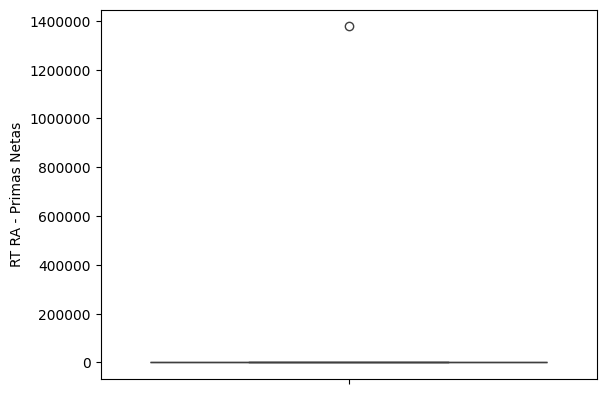

In [9]:
sb.boxplot(data=data2['RT RA - Primas Netas'])
plt.ticklabel_format(style='plain', axis='y')

In [10]:
RT_RA_PRIMA = data2[['RT RA - Primas Netas']]
resultado = pd.concat([resultado, RT_RA_PRIMA], axis=1)

resultado.head(10)

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,RT - Resultado Tecnico Total,RT RA - Primas Netas
58,59,A,INSTITUTO DE SEGUROS,PM,116,RESTO,4.776493e+06,0.000
76,77,A,MISTA,PM,167,RESTO,-7.036112e+05,0.000
72,73,A,MERCANTIL ANDINA,PM,10,10,4.188795e+07,0.000
81,82,A,NORTE,PM,39,50,1.058412e+07,0.000
7,8,A,ASEGURADORES DE CAUCIONES,PM,130,RESTO,1.639039e+06,0.000
89,90,A,PREMIAR,PM,119,RESTO,3.399591e+06,0.000
80,81,A,NOBLE,PM,112,RESTO,1.477523e+06,0.000
23,24,A,CARDIF,PM,73,RESTO,-2.171161e+06,0.000
3,4,A,ALLIANZ,PM,11,20,2.387788e+07,1377594.789
6,7,A,ASEGURADORA DEL SUR,PM,125,RESTO,9.671358e+04,0.000


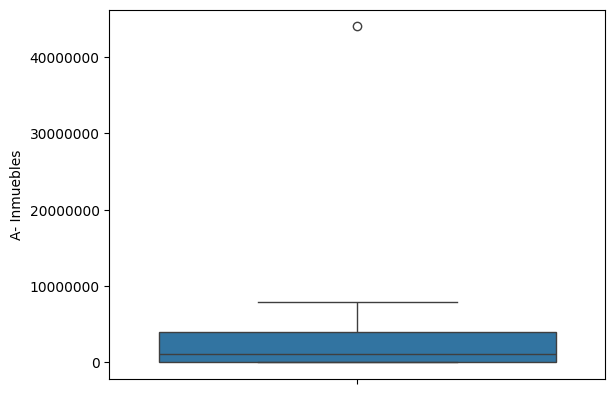

In [11]:
sb.boxplot(data=data2['A- Inmuebles'])
plt.ticklabel_format(style='plain', axis='y')

In [12]:
INMUEBLES = data2[['A- Inmuebles']]
resultado = pd.concat([resultado, INMUEBLES], axis=1)

resultado.head(10)

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,RT - Resultado Tecnico Total,RT RA - Primas Netas,A- Inmuebles
58,59,A,INSTITUTO DE SEGUROS,PM,116,RESTO,4.776493e+06,0.000,0.000000e+00
76,77,A,MISTA,PM,167,RESTO,-7.036112e+05,0.000,0.000000e+00
72,73,A,MERCANTIL ANDINA,PM,10,10,4.188795e+07,0.000,4.402092e+07
81,82,A,NORTE,PM,39,50,1.058412e+07,0.000,2.243213e+06
7,8,A,ASEGURADORES DE CAUCIONES,PM,130,RESTO,1.639039e+06,0.000,4.615690e+06
89,90,A,PREMIAR,PM,119,RESTO,3.399591e+06,0.000,5.217905e+05
80,81,A,NOBLE,PM,112,RESTO,1.477523e+06,0.000,1.562455e+06
23,24,A,CARDIF,PM,73,RESTO,-2.171161e+06,0.000,0.000000e+00
3,4,A,ALLIANZ,PM,11,20,2.387788e+07,1377594.789,7.954588e+06
6,7,A,ASEGURADORA DEL SUR,PM,125,RESTO,9.671358e+04,0.000,0.000000e+00


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Entidad N'].plot(kind='hist', bins=20, title='Entidad N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rank'].plot(kind='hist', bins=20, title='Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RT - Resultado Tecnico Total'].plot(kind='hist', bins=20, title='RT - Resultado Tecnico Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('TOP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Entidad N', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Entidad N', y='Rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Rank', y='RT - Resultado Tecnico Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='RT - Resultado Tecnico Total', y='RT RA - Primas Netas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Entidad N'].plot(kind='line', figsize=(8, 4), title='Entidad N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['RT - Resultado Tecnico Total'].plot(kind='line', figsize=(8, 4), title='RT - Resultado Tecnico Total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['TOP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='TOP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['TOP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Entidad N', y='TOP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['TOP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Rank', y='TOP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['TOP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='RT - Resultado Tecnico Total', y='TOP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

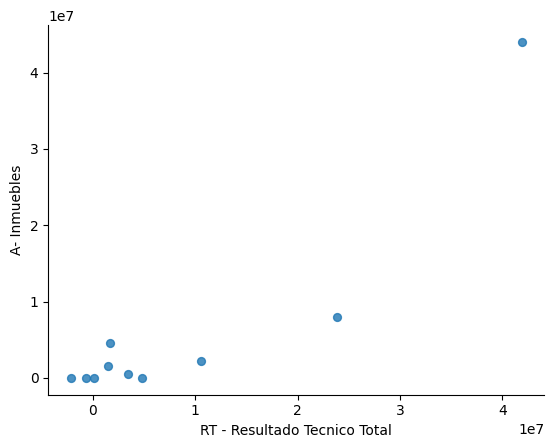

In [15]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='RT - Resultado Tecnico Total', y='A- Inmuebles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 4.

**4. En caso de haber detectado casos anómalos, escriba que decisión tomaría y cuales serían sus consecuencias**

Del analisis se detectó que de los ingresos los casos anomalos están en sintonia con el top, aquellas outliers extremos superior en relacion al TOP corresponde al top 10, el siguiente al top 20 y los outliers extremos negativos estan dentro del grupo Resto. En este Caso la propuesta es analizar esta variable dividido por las categorias de top para realizar una mejor representación del mercado.

Los ingresos por Reaseguro Tecnico tiene muchos casos en 0 lo cual se concluye que no es una variable a considerar para representar el universo. Y respecto a la inversión fija  se puede proponer un analisis de correlación con los ingresos para tomar la decisión.
